✅ Using device: cuda

🔹 Testing SEQ_LEN = 10

🚀 Running LSTM model (seq_len=10)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.1900 | Val Loss: 0.1043 | Val Acc: 0.9668 (Prec: 0.9721, Rec: 0.9805)
Epoch 02 | Train Loss: 0.0942 | Val Loss: 0.0816 | Val Acc: 0.9776 (Prec: 0.9753, Rec: 0.9931)
Epoch 03 | Train Loss: 0.0753 | Val Loss: 0.0782 | Val Acc: 0.9771 (Prec: 0.9774, Rec: 0.9901)
Epoch 04 | Train Loss: 0.0669 | Val Loss: 0.0655 | Val Acc: 0.9816 (Prec: 0.9767, Rec: 0.9976)
Epoch 05 | Train Loss: 0.0624 | Val Loss: 0.0589 | Val Acc: 0.9844 (Prec: 0.9808, Rec: 0.9972)
Epoch 06 | Train Loss: 0.0615 | Val Loss: 0.0539 | Val Acc: 0.9861 (Prec: 0.9826, Rec: 0.9976)
Epoch 07 | Train Loss: 0.0563 | Val Loss: 0.0541 | Val Acc: 0.9863 (Prec: 0.9824, Rec: 0.9981)
Epoch 08 | Train Loss: 0.0552 | Val Loss: 0.0535 | Val Acc: 0.9865 (Prec: 0.9826, Rec: 0.9985)
Epoch 09 | Train Loss: 0.0524 |

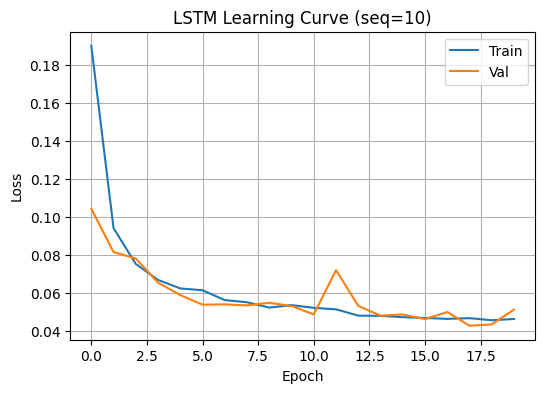

✅ Test → Acc: 0.990, Prec: 0.987, Rec: 0.999

🔹 Testing SEQ_LEN = 25

🚀 Running LSTM model (seq_len=25)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.1265 | Val Loss: 0.0709 | Val Acc: 0.9795 (Prec: 0.9793, Rec: 0.9948)
Epoch 02 | Train Loss: 0.0609 | Val Loss: 0.0609 | Val Acc: 0.9851 (Prec: 0.9853, Rec: 0.9957)
Epoch 03 | Train Loss: 0.0489 | Val Loss: 0.0480 | Val Acc: 0.9883 (Prec: 0.9868, Rec: 0.9984)
Epoch 04 | Train Loss: 0.0442 | Val Loss: 0.0486 | Val Acc: 0.9875 (Prec: 0.9867, Rec: 0.9975)
Epoch 05 | Train Loss: 0.0403 | Val Loss: 0.0443 | Val Acc: 0.9881 (Prec: 0.9857, Rec: 0.9992)
Epoch 06 | Train Loss: 0.0385 | Val Loss: 0.0360 | Val Acc: 0.9909 (Prec: 0.9906, Rec: 0.9978)
Epoch 07 | Train Loss: 0.0355 | Val Loss: 0.0370 | Val Acc: 0.9910 (Prec: 0.9893, Rec: 0.9993)
Epoch 08 | Train Loss: 0.0348 | Val Loss: 0.0346 | Val Acc: 0.9915 (Prec: 0.9900, Rec: 0.9993)
Epoch 0

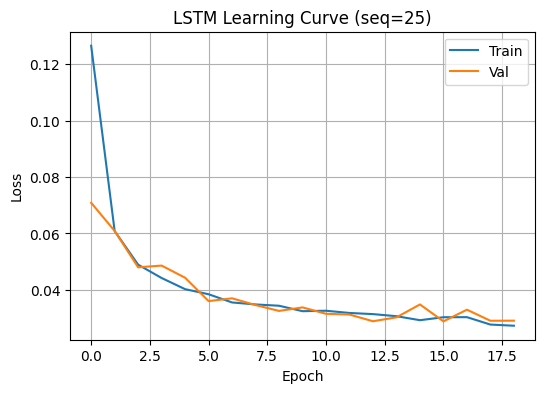

✅ Test → Acc: 0.994, Prec: 0.993, Rec: 0.999

🔹 Testing SEQ_LEN = 50

🚀 Running LSTM model (seq_len=50)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.0862 | Val Loss: 0.0441 | Val Acc: 0.9874 (Prec: 0.9881, Rec: 0.9975)
Epoch 02 | Train Loss: 0.0379 | Val Loss: 0.0406 | Val Acc: 0.9891 (Prec: 0.9895, Rec: 0.9980)
Epoch 03 | Train Loss: 0.0295 | Val Loss: 0.0268 | Val Acc: 0.9932 (Prec: 0.9930, Rec: 0.9991)
Epoch 04 | Train Loss: 0.0270 | Val Loss: 0.0257 | Val Acc: 0.9933 (Prec: 0.9930, Rec: 0.9993)
Epoch 05 | Train Loss: 0.0235 | Val Loss: 0.0230 | Val Acc: 0.9939 (Prec: 0.9936, Rec: 0.9993)
Epoch 06 | Train Loss: 0.0226 | Val Loss: 0.0248 | Val Acc: 0.9937 (Prec: 0.9930, Rec: 0.9998)
Epoch 07 | Train Loss: 0.0215 | Val Loss: 0.0214 | Val Acc: 0.9945 (Prec: 0.9946, Rec: 0.9991)
Epoch 08 | Train Loss: 0.0209 | Val Loss: 0.0197 | Val Acc: 0.9950 (Prec: 0.9948, Rec: 0.9994)
Epoch 0

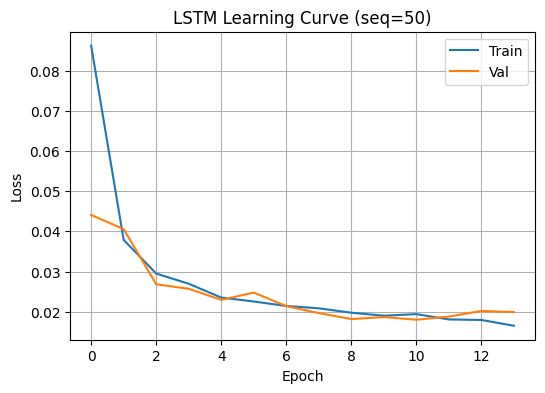

✅ Test → Acc: 0.996, Prec: 0.996, Rec: 1.000

🔹 Testing SEQ_LEN = 100

🚀 Running LSTM model (seq_len=100)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.0859 | Val Loss: 0.0470 | Val Acc: 0.9873 (Prec: 0.9877, Rec: 0.9978)
Epoch 02 | Train Loss: 0.0395 | Val Loss: 0.0342 | Val Acc: 0.9908 (Prec: 0.9908, Rec: 0.9985)
Epoch 03 | Train Loss: 0.0300 | Val Loss: 0.0276 | Val Acc: 0.9921 (Prec: 0.9939, Rec: 0.9969)
Epoch 04 | Train Loss: 0.0239 | Val Loss: 0.0203 | Val Acc: 0.9939 (Prec: 0.9946, Rec: 0.9984)
Epoch 05 | Train Loss: 0.0216 | Val Loss: 0.0214 | Val Acc: 0.9937 (Prec: 0.9938, Rec: 0.9989)
Epoch 06 | Train Loss: 0.0199 | Val Loss: 0.0195 | Val Acc: 0.9943 (Prec: 0.9948, Rec: 0.9986)
Epoch 07 | Train Loss: 0.0173 | Val Loss: 0.0173 | Val Acc: 0.9949 (Prec: 0.9959, Rec: 0.9982)
Epoch 08 | Train Loss: 0.0166 | Val Loss: 0.0205 | Val Acc: 0.9940 (Prec: 0.9950, Rec: 0.9980)
Epoch

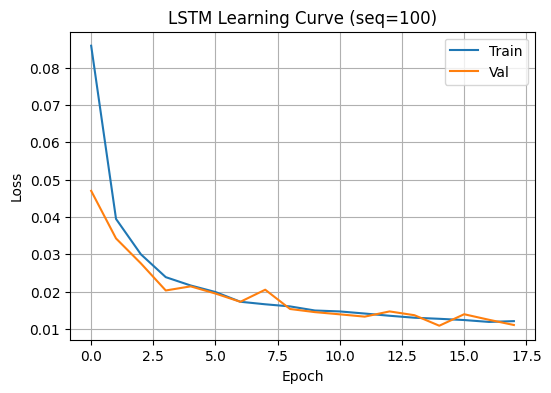

✅ Test → Acc: 0.997, Prec: 0.998, Rec: 0.999

🔸 Testing NUM_LAYERS = 1

🚀 Running LSTM model (seq_len=50)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.1045 | Val Loss: 0.0555 | Val Acc: 0.9839 (Prec: 0.9858, Rec: 0.9957)
Epoch 02 | Train Loss: 0.0507 | Val Loss: 0.0423 | Val Acc: 0.9886 (Prec: 0.9896, Rec: 0.9973)
Epoch 03 | Train Loss: 0.0395 | Val Loss: 0.0366 | Val Acc: 0.9899 (Prec: 0.9913, Rec: 0.9970)
Epoch 04 | Train Loss: 0.0339 | Val Loss: 0.0325 | Val Acc: 0.9910 (Prec: 0.9907, Rec: 0.9989)
Epoch 05 | Train Loss: 0.0302 | Val Loss: 0.0295 | Val Acc: 0.9923 (Prec: 0.9934, Rec: 0.9976)
Epoch 06 | Train Loss: 0.0298 | Val Loss: 0.0280 | Val Acc: 0.9924 (Prec: 0.9924, Rec: 0.9989)
Epoch 07 | Train Loss: 0.0262 | Val Loss: 0.0265 | Val Acc: 0.9933 (Prec: 0.9930, Rec: 0.9992)
Epoch 08 | Train Loss: 0.0258 | Val Loss: 0.0267 | Val Acc: 0.9932 (Prec: 0.9931, Rec: 0.9991)
Epoch

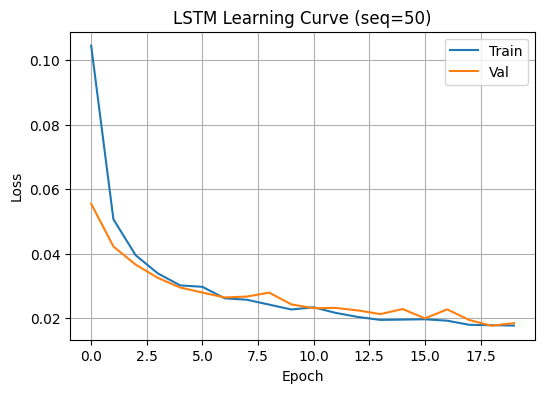

✅ Test → Acc: 0.996, Prec: 0.996, Rec: 0.999

🔸 Testing NUM_LAYERS = 2

🚀 Running LSTM model (seq_len=50)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.0864 | Val Loss: 0.0433 | Val Acc: 0.9876 (Prec: 0.9881, Rec: 0.9977)
Epoch 02 | Train Loss: 0.0356 | Val Loss: 0.0319 | Val Acc: 0.9917 (Prec: 0.9930, Rec: 0.9974)
Epoch 03 | Train Loss: 0.0286 | Val Loss: 0.0263 | Val Acc: 0.9932 (Prec: 0.9929, Rec: 0.9993)
Epoch 04 | Train Loss: 0.0262 | Val Loss: 0.0235 | Val Acc: 0.9940 (Prec: 0.9937, Rec: 0.9994)
Epoch 05 | Train Loss: 0.0238 | Val Loss: 0.0242 | Val Acc: 0.9935 (Prec: 0.9932, Rec: 0.9994)
Epoch 06 | Train Loss: 0.0219 | Val Loss: 0.0231 | Val Acc: 0.9939 (Prec: 0.9937, Rec: 0.9993)
Epoch 07 | Train Loss: 0.0217 | Val Loss: 0.0219 | Val Acc: 0.9941 (Prec: 0.9940, Rec: 0.9992)
Epoch 08 | Train Loss: 0.0199 | Val Loss: 0.0222 | Val Acc: 0.9939 (Prec: 0.9936, Rec: 0.9994)
Epoch

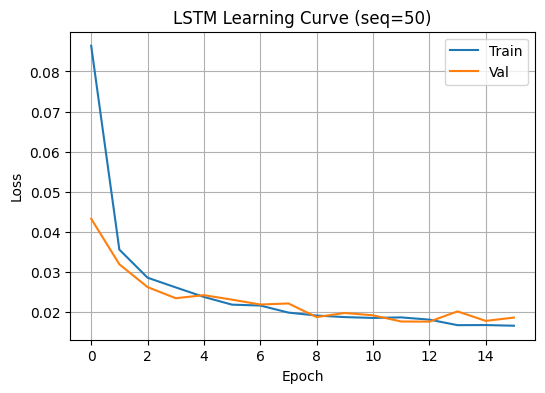

✅ Test → Acc: 0.996, Prec: 0.996, Rec: 1.000

🔸 Testing NUM_LAYERS = 3

🚀 Running LSTM model (seq_len=50)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.0820 | Val Loss: 0.0376 | Val Acc: 0.9897 (Prec: 0.9912, Rec: 0.9969)
Epoch 02 | Train Loss: 0.0337 | Val Loss: 0.0288 | Val Acc: 0.9924 (Prec: 0.9929, Rec: 0.9984)
Epoch 03 | Train Loss: 0.0280 | Val Loss: 0.0280 | Val Acc: 0.9925 (Prec: 0.9927, Rec: 0.9987)
Epoch 04 | Train Loss: 0.0256 | Val Loss: 0.0248 | Val Acc: 0.9937 (Prec: 0.9939, Rec: 0.9988)
Epoch 05 | Train Loss: 0.0230 | Val Loss: 0.0205 | Val Acc: 0.9947 (Prec: 0.9946, Rec: 0.9993)
Epoch 06 | Train Loss: 0.0220 | Val Loss: 0.0233 | Val Acc: 0.9941 (Prec: 0.9937, Rec: 0.9995)
Epoch 07 | Train Loss: 0.0213 | Val Loss: 0.0213 | Val Acc: 0.9944 (Prec: 0.9943, Rec: 0.9992)
Epoch 08 | Train Loss: 0.0206 | Val Loss: 0.0253 | Val Acc: 0.9935 (Prec: 0.9949, Rec: 0.9975)
EARLY

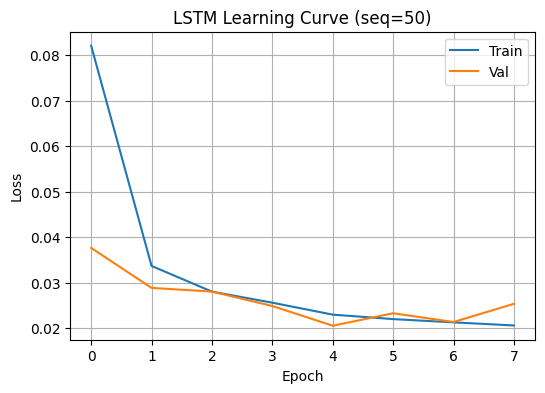

✅ Test → Acc: 0.994, Prec: 0.995, Rec: 0.998

🔹 Testing HIDDEN_UNIT = 64

🚀 Running LSTM model (seq_len=50)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.0954 | Val Loss: 0.0485 | Val Acc: 0.9858 (Prec: 0.9857, Rec: 0.9982)
Epoch 02 | Train Loss: 0.0410 | Val Loss: 0.0352 | Val Acc: 0.9902 (Prec: 0.9908, Rec: 0.9979)
Epoch 03 | Train Loss: 0.0319 | Val Loss: 0.0628 | Val Acc: 0.9831 (Prec: 0.9828, Rec: 0.9979)
Epoch 04 | Train Loss: 0.0297 | Val Loss: 0.0305 | Val Acc: 0.9921 (Prec: 0.9922, Rec: 0.9987)
Epoch 05 | Train Loss: 0.0269 | Val Loss: 0.0249 | Val Acc: 0.9934 (Prec: 0.9934, Rec: 0.9990)
Epoch 06 | Train Loss: 0.0238 | Val Loss: 0.0257 | Val Acc: 0.9934 (Prec: 0.9945, Rec: 0.9978)
Epoch 07 | Train Loss: 0.0226 | Val Loss: 0.0211 | Val Acc: 0.9944 (Prec: 0.9944, Rec: 0.9991)
Epoch 08 | Train Loss: 0.0220 | Val Loss: 0.0253 | Val Acc: 0.9930 (Prec: 0.9929, Rec: 0.9990)
Epo

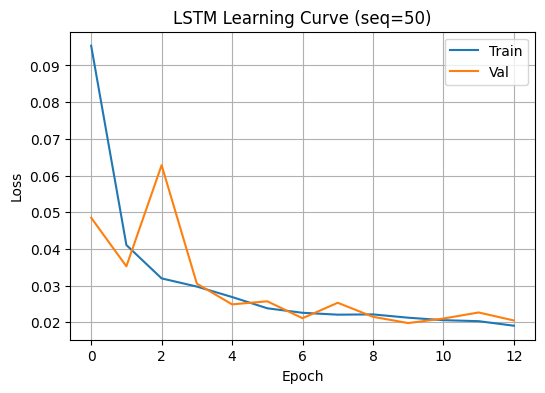

✅ Test → Acc: 0.996, Prec: 0.996, Rec: 0.999

🔹 Testing HIDDEN_UNIT = 128

🚀 Running LSTM model (seq_len=50)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.0856 | Val Loss: 0.0456 | Val Acc: 0.9873 (Prec: 0.9873, Rec: 0.9981)
Epoch 02 | Train Loss: 0.0380 | Val Loss: 0.0345 | Val Acc: 0.9906 (Prec: 0.9907, Rec: 0.9984)
Epoch 03 | Train Loss: 0.0293 | Val Loss: 0.0288 | Val Acc: 0.9922 (Prec: 0.9930, Rec: 0.9980)
Epoch 04 | Train Loss: 0.0259 | Val Loss: 0.0249 | Val Acc: 0.9937 (Prec: 0.9932, Rec: 0.9995)
Epoch 05 | Train Loss: 0.0234 | Val Loss: 0.0217 | Val Acc: 0.9945 (Prec: 0.9948, Rec: 0.9989)
Epoch 06 | Train Loss: 0.0225 | Val Loss: 0.0211 | Val Acc: 0.9946 (Prec: 0.9942, Rec: 0.9995)
Epoch 07 | Train Loss: 0.0215 | Val Loss: 0.0225 | Val Acc: 0.9941 (Prec: 0.9939, Rec: 0.9993)
Epoch 08 | Train Loss: 0.0207 | Val Loss: 0.0208 | Val Acc: 0.9941 (Prec: 0.9947, Rec: 0.9985)
Ep

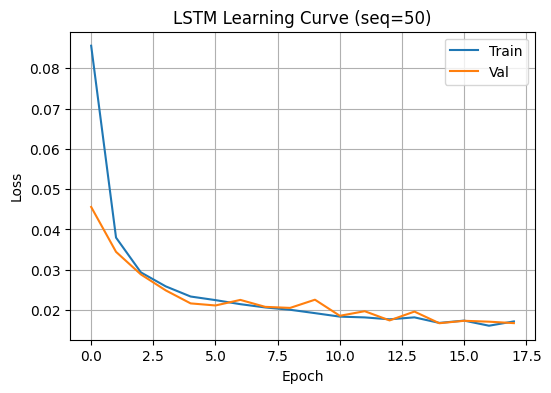

✅ Test → Acc: 0.995, Prec: 0.995, Rec: 0.999

🔹 Testing HIDDEN_UNIT = 256

🚀 Running LSTM model (seq_len=50)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.0821 | Val Loss: 0.0463 | Val Acc: 0.9872 (Prec: 0.9883, Rec: 0.9970)
Epoch 02 | Train Loss: 0.0377 | Val Loss: 0.0303 | Val Acc: 0.9918 (Prec: 0.9918, Rec: 0.9988)
Epoch 03 | Train Loss: 0.0281 | Val Loss: 0.0266 | Val Acc: 0.9928 (Prec: 0.9944, Rec: 0.9973)
Epoch 04 | Train Loss: 0.0270 | Val Loss: 0.0256 | Val Acc: 0.9936 (Prec: 0.9936, Rec: 0.9990)
Epoch 05 | Train Loss: 0.0236 | Val Loss: 0.0223 | Val Acc: 0.9943 (Prec: 0.9939, Rec: 0.9995)
Epoch 06 | Train Loss: 0.0227 | Val Loss: 0.0217 | Val Acc: 0.9942 (Prec: 0.9945, Rec: 0.9988)
Epoch 07 | Train Loss: 0.0219 | Val Loss: 0.0226 | Val Acc: 0.9942 (Prec: 0.9937, Rec: 0.9996)
Epoch 08 | Train Loss: 0.0207 | Val Loss: 0.0176 | Val Acc: 0.9957 (Prec: 0.9953, Rec: 0.9997)
Ep

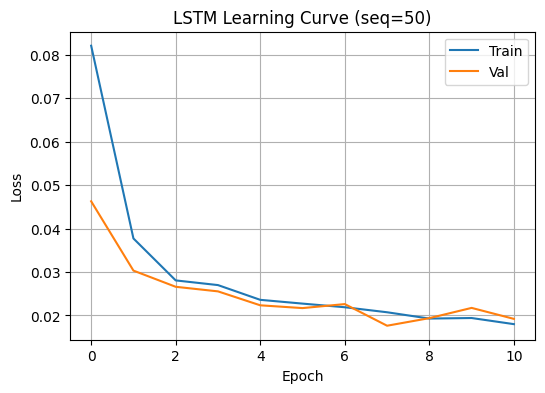

✅ Test → Acc: 0.996, Prec: 0.996, Rec: 0.999

🔸 Testing MODEL = LSTM

🚀 Running LSTM model (seq_len=50)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.0867 | Val Loss: 0.0503 | Val Acc: 0.9843 (Prec: 0.9850, Rec: 0.9970)
Epoch 02 | Train Loss: 0.0399 | Val Loss: 0.0313 | Val Acc: 0.9913 (Prec: 0.9917, Rec: 0.9982)
Epoch 03 | Train Loss: 0.0288 | Val Loss: 0.0246 | Val Acc: 0.9935 (Prec: 0.9943, Rec: 0.9982)
Epoch 04 | Train Loss: 0.0259 | Val Loss: 0.0247 | Val Acc: 0.9938 (Prec: 0.9944, Rec: 0.9985)
Epoch 05 | Train Loss: 0.0241 | Val Loss: 0.0241 | Val Acc: 0.9934 (Prec: 0.9930, Rec: 0.9994)
Epoch 06 | Train Loss: 0.0224 | Val Loss: 0.0234 | Val Acc: 0.9939 (Prec: 0.9951, Rec: 0.9979)
Epoch 07 | Train Loss: 0.0211 | Val Loss: 0.0220 | Val Acc: 0.9946 (Prec: 0.9943, Rec: 0.9994)
Epoch 08 | Train Loss: 0.0207 | Val Loss: 0.0199 | Val Acc: 0.9947 (Prec: 0.9950, Rec: 0.9989)
Epoch 0

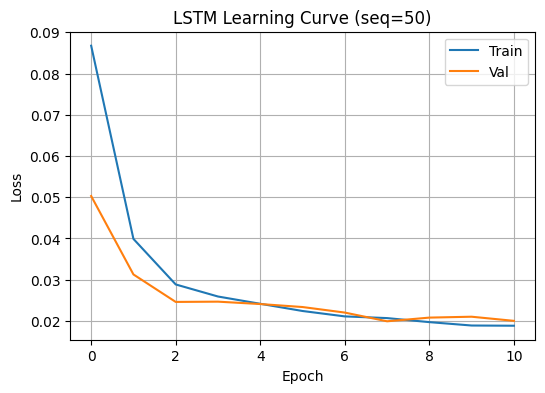

✅ Test → Acc: 0.996, Prec: 0.995, Rec: 1.000

🔸 Testing MODEL = BILSTM

🚀 Running BILSTM model (seq_len=50)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.0641 | Val Loss: 0.0309 | Val Acc: 0.9926 (Prec: 0.9921, Rec: 0.9994)
Epoch 02 | Train Loss: 0.0298 | Val Loss: 0.0270 | Val Acc: 0.9933 (Prec: 0.9928, Rec: 0.9996)
Epoch 03 | Train Loss: 0.0250 | Val Loss: 0.0222 | Val Acc: 0.9944 (Prec: 0.9939, Rec: 0.9996)
Epoch 04 | Train Loss: 0.0219 | Val Loss: 0.0230 | Val Acc: 0.9944 (Prec: 0.9942, Rec: 0.9993)
Epoch 05 | Train Loss: 0.0214 | Val Loss: 0.0213 | Val Acc: 0.9943 (Prec: 0.9938, Rec: 0.9997)
Epoch 06 | Train Loss: 0.0204 | Val Loss: 0.0206 | Val Acc: 0.9950 (Prec: 0.9945, Rec: 0.9997)
Epoch 07 | Train Loss: 0.0197 | Val Loss: 0.0202 | Val Acc: 0.9947 (Prec: 0.9942, Rec: 0.9997)
Epoch 08 | Train Loss: 0.0194 | Val Loss: 0.0198 | Val Acc: 0.9949 (Prec: 0.9944, Rec: 0.9997)
Epo

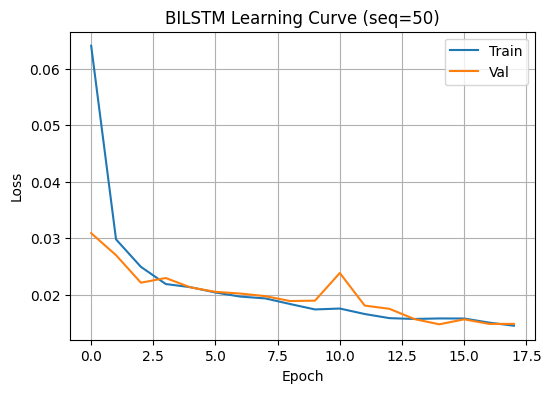

✅ Test → Acc: 0.997, Prec: 0.997, Rec: 0.999

🔸 Testing MODEL = CNNLSTM

🚀 Running CNNLSTM model (seq_len=50)...
📊 Dataset split: Train=84844, Val=9981, Test=11005
✅ DataLoaders ready: Train=1326 batches, Val=156 batches, Test=172 batches
Epoch 01 | Train Loss: 0.0329 | Val Loss: 0.0015 | Val Acc: 0.9996 (Prec: 0.9998, Rec: 0.9997)
Epoch 02 | Train Loss: 0.0024 | Val Loss: 0.0009 | Val Acc: 0.9998 (Prec: 0.9998, Rec: 1.0000)
Epoch 03 | Train Loss: 0.0005 | Val Loss: 0.0002 | Val Acc: 1.0000 (Prec: 1.0000, Rec: 1.0000)
Epoch 04 | Train Loss: 0.0003 | Val Loss: 0.0002 | Val Acc: 1.0000 (Prec: 1.0000, Rec: 1.0000)
Epoch 05 | Train Loss: 0.0003 | Val Loss: 0.0000 | Val Acc: 1.0000 (Prec: 1.0000, Rec: 1.0000)
Epoch 06 | Train Loss: 0.0014 | Val Loss: 0.0002 | Val Acc: 1.0000 (Prec: 1.0000, Rec: 1.0000)
Epoch 07 | Train Loss: 0.0003 | Val Loss: 0.0002 | Val Acc: 1.0000 (Prec: 1.0000, Rec: 1.0000)
Epoch 08 | Train Loss: 0.0001 | Val Loss: 0.0002 | Val Acc: 0.9999 (Prec: 0.9999, Rec: 1.0000)
E

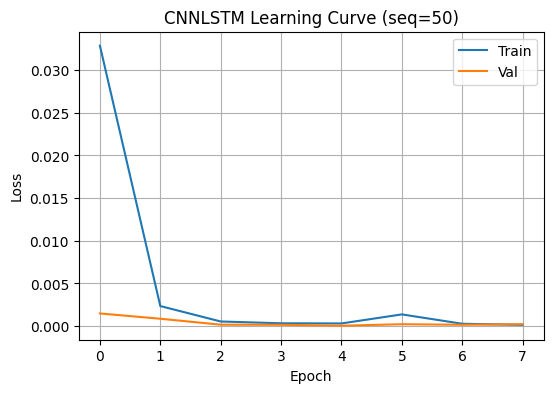

✅ Test → Acc: 1.000, Prec: 1.000, Rec: 1.000


,Factor,Value,Model,HiddenUnit,Layer,Accuracy,Precision,Recall,Time (s)
0,SeqLen,10,LSTM,128,2,0.990223,0.986713,0.999372,1891.1
1,SeqLen,25,LSTM,128,2,0.994333,0.993366,0.999493,1793.1
2,SeqLen,50,LSTM,128,2,0.996171,0.995883,0.999704,1324.1
3,SeqLen,100,LSTM,128,2,0.997018,0.997745,0.998787,1707.4
4,Layers,1,LSTM,128,1,0.995724,0.995678,0.999400,1883.5
5,Layers,2,LSTM,128,2,0.995942,0.995742,0.999584,1512.0
6,Layers,3,LSTM,128,3,0.994075,0.995460,0.997714,764.1
7,HiddenUnit,64,LSTM,64,2,0.995920,0.995885,0.999404,1232.6
8,HiddenUnit,128,LSTM,128,2,0.995375,0.995380,0.999290,1701.0
9,HiddenUnit,256,LSTM,256,2,0.996013,0.995941,0.999460,1059.5


In [1]:
# ============================================================
# CSE 5526 - Programming Assignment 2
# Voice Activity Detection in Noise using Deep Learning
# ============================================================

# --- Imports ---
from experiments import run_experiment
import pandas as pd
import time
import warnings
warnings.filterwarnings("ignore", message=".*torchaudio.*backend.*", category=UserWarning)
warnings.filterwarnings("ignore", message=".*torchcodec.*AudioDecoder.*", category=UserWarning)

# ============================================================
# run.ipynb
# ============================================================

results = []

DEFAULT_HIDDEN = 128
DEFAULT_LAYERS = 2
DEFAULT_SEQ = 50
DEFAULT_MODEL = "lstm"

# ------------------------------------------------------------
# 1️⃣ Test SEQUENCE LENGTH independently
# ------------------------------------------------------------
for seq_len in [10, 25, 50, 100]:
    print(f"\n🔹 Testing SEQ_LEN = {seq_len}")
    start = time.time()
    acc, prec, rec = run_experiment(
        DEFAULT_MODEL, n_features=40, hidden_size=DEFAULT_HIDDEN,
        layers=DEFAULT_LAYERS, seq_len=seq_len
    )
    end = time.time()

    results.append({
        "Factor": "SeqLen",
        "Value": seq_len,
        "Model": DEFAULT_MODEL.upper(),
        "HiddenUnit": DEFAULT_HIDDEN,
        "Layer": DEFAULT_LAYERS,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "Time (s)": round(end - start, 1)
    })


# ------------------------------------------------------------
# 2️⃣ Test NUMBER OF LAYERS independently
# ------------------------------------------------------------
for num_layer in [1, 2, 3]:
    print(f"\n🔸 Testing NUM_LAYERS = {num_layer}")
    start = time.time()
    acc, prec, rec = run_experiment(
        DEFAULT_MODEL, n_features=40, hidden_size=DEFAULT_HIDDEN,
        layers=num_layer, seq_len=DEFAULT_SEQ
    )
    end = time.time()

    results.append({
        "Factor": "Layers",
        "Value": num_layer,
        "Model": DEFAULT_MODEL.upper(),
        "HiddenUnit": DEFAULT_HIDDEN,
        "Layer": num_layer,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "Time (s)": round(end - start, 1)
    })


# ------------------------------------------------------------
# 3️⃣ Test HIDDEN UNITS independently
# ------------------------------------------------------------
for hidden_unit in [64, 128, 256]:
    print(f"\n🔹 Testing HIDDEN_UNIT = {hidden_unit}")
    start = time.time()
    acc, prec, rec = run_experiment(
        DEFAULT_MODEL, n_features=40, hidden_size=hidden_unit,
        layers=DEFAULT_LAYERS, seq_len=DEFAULT_SEQ
    )
    end = time.time()

    results.append({
        "Factor": "HiddenUnit",
        "Value": hidden_unit,
        "Model": DEFAULT_MODEL.upper(),
        "HiddenUnit": hidden_unit,
        "Layer": DEFAULT_LAYERS,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "Time (s)": round(end - start, 1)
    })


# ------------------------------------------------------------
# 4️⃣ Test MODEL TYPES independently
# ------------------------------------------------------------
for model_name in ["lstm", "bilstm", "cnnlstm"]:
    print(f"\n🔸 Testing MODEL = {model_name.upper()}")
    start = time.time()
    acc, prec, rec = run_experiment(
        model_name, n_features=40, hidden_size=DEFAULT_HIDDEN,
        layers=DEFAULT_LAYERS, seq_len=DEFAULT_SEQ
    )
    end = time.time()

    results.append({
        "Factor": "ModelType",
        "Value": model_name.upper(),
        "Model": model_name.upper(),
        "HiddenUnit": DEFAULT_HIDDEN,
        "Layer": DEFAULT_LAYERS,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "Time (s)": round(end - start, 1)
    })


# ------------------------------------------------------------
# Display results as a table
# ------------------------------------------------------------
df = pd.DataFrame(results)
display(df)